In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Accuracy: 1.0


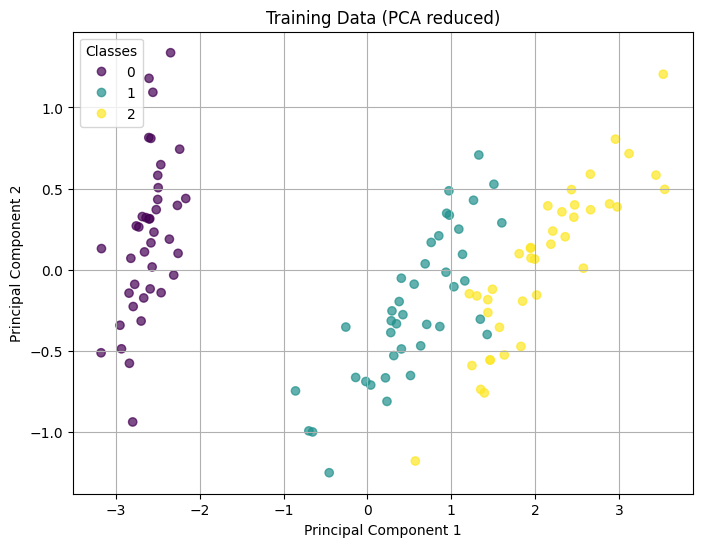

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # or any dataset
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pc = PCA(n_components=2)
x_train_pca = pc.fit_transform(x_train)
x_test_pca = pc.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

y_pred = lr.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('Training Data (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()


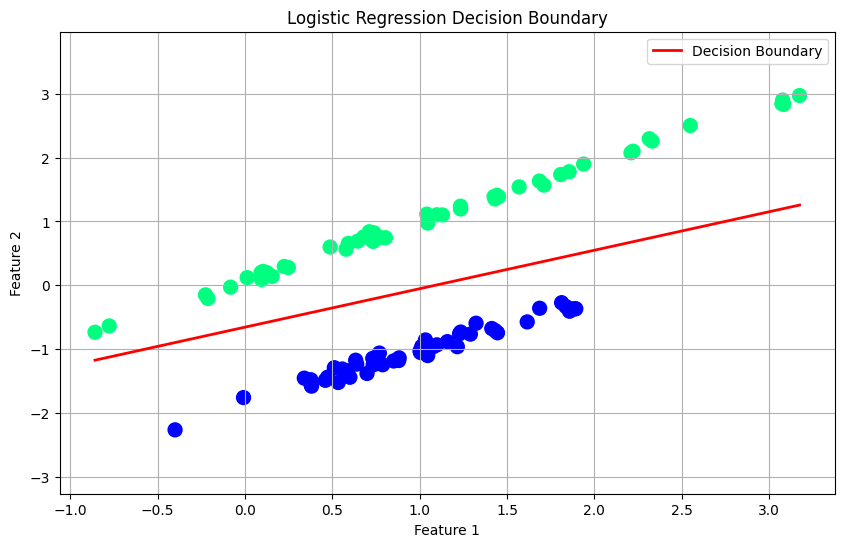

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

lor = LogisticRegression()
lor.fit(X, y)

m = -(lor.coef_[0][0] / lor.coef_[0][1])
b = -(lor.intercept_ / lor.coef_[0][1])

x_input1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_input1 = m * x_input1 + b

plt.figure(figsize=(10, 6))
plt.plot(x_input1, y_input1.flatten(), color='red', linewidth=2, label='Decision Boundary')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()


Intercept: 0.20000000000000015
Coefficients: [-0.11194412  1.31937229]


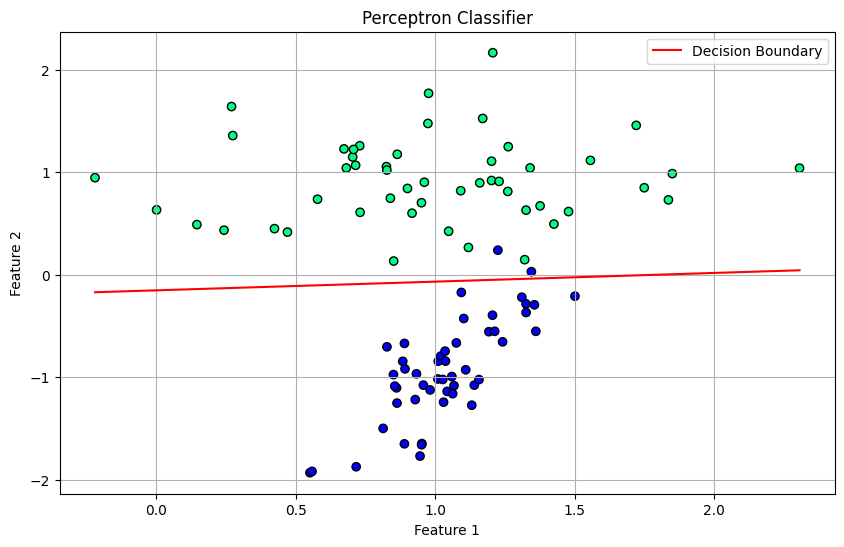

In [4]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

def step(z):
    return 1 if z > 0 else 0

def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.ones(X.shape[1])  # Initialize weights
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, len(X))
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    intercept = weights[0]
    coef = weights[1:]
    return intercept, coef

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1,
                           random_state=11)

intercept, coef = perceptron(X, y)

print("Intercept:", intercept)
print("Coefficients:", coef)

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(coef[0] / coef[1]) * x_vals - (intercept / coef[1])

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolor='k')
plt.plot(x_vals, y_vals, color='red', label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Classifier")
plt.legend()
plt.grid(True)
plt.show()
